## COOKBOOK
### 1- Import of python modules

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy.stats as scp
from math import *
from collections import OrderedDict
from utils import *
import scipy.optimize as optimizer
from portfolio_stats import *
from portfolio_opt import mean_variance_opt as mvo
#import yfinance as yf

%matplotlib inline

import chart_studio.plotly as py
import plotly.express as px
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

### 2- Data import & cleaning

This cookbook is mainly aimed at trying to test the python code and modules. The list of ETF tickers is purposely chosen and tries to reproduce my current holdings in December 2020.  
  - LQQ : Lyxor Nasdaq-100 Daily (2x) Leveraged UCITS ETF Acc --
  - HLT : Lyxor Index Fund - Lyxor Stoxx Europe 600 Healthcare UCITS ETF Acc -- 
  - FOO : Lyxor Index Fund - Lyxor Stoxx Europe 600 Food & Beverage UCITS ETF Acc --
  - MVAU : Lyxor FTSE USA Minimum Variance UCITS ETF --
  - AWAT : Lyxor PEA Eau (World Water) UCITS ETF Capi --
  
Data are sourced from https://www.lyxoretf.fr/

#### Cleaning and converting daily data to weekly data...

In [2]:
paths = ['Data/NAV_lqq.csv', 'Data/NAV_awat.csv']#, 'Data/NAV_foo.csv', 'Data/NAV_hlt.csv', 'Data/NAV_mvau.csv']
tickers = ['lqq', 'awat']#, 'foo', 'hlt', 'mvau']
portfolio_raw_data = import_data(paths, tickers)
portfolio_raw_data.shape

(2801, 2)

In [3]:
paths = ['Data/NAV_lqq.csv']
tickers = ['lqq']#, 'foo', 'hlt', 'mvau']
portfolio_raw_data = import_data(paths, tickers)
portfolio_raw_data.shape

(2749, 1)

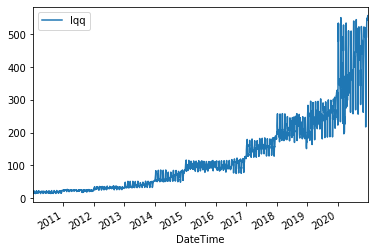

In [22]:
portfolio_raw_data.plot

#### Data preparation for further analyses and portfolio construction...

In [5]:
period_per_year, portfolio_comp_returns = get_clean_data(portfolio_raw_data, components='prices', period='daily')
portfolio_comp_returns.cumsum().iplot()

In [9]:
portfolio_comp_returns

,lqq
DateTime,
2010-05-01,0.003049
2010-06-01,-0.008511
2010-07-01,0.002452
2010-08-01,0.017125
2010-11-01,-0.022249
...,...
2020-12-22,0.007951
2020-12-23,-0.011629
2020-12-24,0.009390
